start


b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

ValueError: could not convert string to float: 'Men'

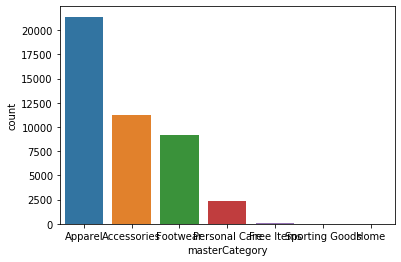

In [335]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA



# for check
print('start')
# Read File
df = pd.read_csv('styles.csv',error_bad_lines=False)
#print('df.columns:',len(df.columns))

#Plot for masterCategory
sns.countplot(x='masterCategory', data=df)

#
# put id to names list 
# put img flattened numpy array to arrays 
# if no img file -> put id into noarrays
# else if img file size is not (80,60,3) -> put id into ngarrays
# 

path = './images/'

# initialize arrays
arrays = []
names = []
# arrays for ng img
ngarrays = []
noarrays = []

for i in df['id']:
    try:
        fim = plt.imread(path + str(i) +'.jpg')
    
    except:
        #no file is found
        noarrays.append(i)
    else:
        if(fim.shape == (80,60,3)):
            names.append(i) 
            arrays.append(fim.flatten())
        else:
            #img shape is not proper
            ngarrays.append(i)

# test print 
#print(len(df),len(arrays),len(ngarrays),len(noarrays))   

a = np.reshape(arrays,(-1,cmn))
b = np.reshape(names,(-1,1))

c=np.concatenate([b,a],axis=1)

#
# make dataframe by concatenating names and arrays
#
imagedf = pd.DataFrame(c)
imagedf['id'] = b

#
# merge DataFrames (df & imagedf)
# and drop column id
#

df1=pd.merge(df,imagedf,on='id',how='inner')
DF = df1.drop('id',axis=1)

#test
#print('df1.columns',len(df1.columns))
#print('DF.columns',len(DF.columns))
#print(df1.head())
#print(DF.head())
#for check
#print('done')

#
# sklearn 
#
X = DF[['gender', 'subCategory','articleType','baseColour','season','year','usage','productDisplayName']]
y = DF['masterCategory']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pca = PCA(n_components=10)
pca.fit(X_train,y_train)

P_train= pca.fit_transform(DF, X_train)
P_test = pca.fit_transform(DF, X_test)

#
# 
#
prediction = pca.predict(P_test)


#
# make confusion matrix
#

In [327]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


# Read file
df = pd.read_csv('styles.csv',error_bad_lines=False)

#test
print(df.shape)
#df.sample(10)
#test

path = './images/'

arrays = []
#arrays for Error
noarrays = []
ngarrays = []

#fnm = [1525,1531,39403,1163,12347,1537]
fnm = [1525,1531,1163,1537]
for i in fnm:
    names.append(i)
    
    try:
        fim = plt.imread(path + str(i) +'.jpg')
        
    except:
        print('no jpg')
        arrays.append('')
        noarrays.append(i)

    else:
        if(fim.shape == (80,60,3)):
            arrays.append(fim.flatten())
            cmn= len(fim.flatten())

        else:
#            print(fim.shape)
            ngarrays.append(i)
            arrays.append('')
#            print('size is not 80,60,3')
#            print(fim.shape)
    
print(cmn)
a=np.reshape(arrays,(-1,cmn))
b = np.reshape(fnm,(-1,1))
#print(arrays,ngarrays, noarrays)
print(a)
print(b)
print(ngarrays, noarrays)
print(a.shape,a.ndim,a.size)
#arrays
c = np.concatenate([b,a],axis=1)
print(c)

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

(44424, 10)
14400
[[195 192 187 ... 195 192 187]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[1525]
 [1531]
 [1163]
 [1537]]
[] []
(4, 14400) 2 57600
[[1525  195  192 ...  195  192  187]
 [1531  255  255 ...  255  255  255]
 [1163  255  255 ...  255  255  255]
 [1537  255  255 ...  255  255  255]]


In [317]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# find jpg which size is not (80,60,3)

# Read file
df = pd.read_csv('styles.csv',error_bad_lines=False)

names = []
arrays = []
ngarrays = []
noarrays = []

print('start')

for i in df['id']:
    try:
        fim = plt.imread(path + str(i) +'.jpg')
        
    except:
        print('no jpg',str(i))
        noarrays.append(i)
    else:
        if(fim.shape == (80,60,3)):
            names.append(i)
            arrays.append(fim.flatten())
            
        else:
            ngarrays.append(i)

cmn= len(fim.flatten())

a = np.reshape(arrays,(-1,cmn))
print('a:',a.shape, a.ndim, a.size)

b = np.reshape(names,(-1,1))
#check
print('b:',b.shape, b.ndim, b.size)

#c = np.concatenate([b,a],axis=1)

imagedf = pd.DataFrame(a)
imagedf['id'] = b
#imagedf = pd.DataFrame(c)
#imagedf.index_set('id')
print(imagedf.head())

print('done')


b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

start
no jpg 39403
no jpg 39410
no jpg 39401
no jpg 39425
no jpg 12347
a: (43965, 14400) 2 633096000
b: (43965, 1) 2 43965
     0    1    2    3    4    5    6    7    8    9  ...  14391  14392  14393  \
0  255  255  255  255  255  255  255  255  255  255  ...    254    255    255   
1  255  255  255  255  255  255  255  255  255  255  ...    255    255    255   
2  255  255  255  255  255  255  255  255  255  255  ...    255    255    255   
3  255  255  255  255  255  255  255  255  255  255  ...    255    255    255   
4  255  255  255  255  255  255  255  255  255  255  ...    255    255    255   

   14394  14395  14396  14397  14398  14399     id  
0    254    255    253    255    255    251  15970  
1    255    255    255    255    255    255  39386  
2    255    255    255    255    255    255  21379  
3    255    255    255    255    255    255  53759  
4    255    255    255    255    255    255   1855  

[5 rows x 14401 columns]
done


In [153]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# find jpg which size is not (80,60,3)

# Read file
df = pd.read_csv('styles.csv',error_bad_lines=False)

print(len(df))
df.sample(10)

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

44424


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
2123,52879,Women,Apparel,Saree,Sarees,Magenta,Fall,2012.0,Ethnic,FNF Magenta Printed Sari
41929,58731,Women,Apparel,Topwear,Tshirts,Pink,Summer,2012.0,Casual,Puma Women Pink T-shirt
41036,8500,Women,Apparel,Dress,Dresses,Multi,Fall,2011.0,Casual,Forever New Women GeoPrint Multi Coloured Dress
1770,27020,Women,Apparel,Bottomwear,Jeans,Navy Blue,Summer,2012.0,Casual,Jealous 21 Women Navy Blue Jeans
37491,25884,Unisex,Accessories,Bags,Backpacks,Brown,Winter,2015.0,Casual,American Tourister Unisex Brown Backpack
14715,28190,Men,Accessories,Eyewear,Sunglasses,Gold,Winter,2016.0,Casual,Ray-Ban Men Aviator Sunglasses
5482,38653,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Nike Men Avid Black Casual Shoes
29439,26412,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Casual,Turtle Men Check Green Shirt
17618,33435,Women,Accessories,Bags,Handbags,Brown,Summer,2012.0,Casual,Baggit Women Motto Taj Brown Sling Bag
18495,30210,Men,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Formal,John Miller Men Purple Shirt


In [250]:
a=[]
a.append([1,2,3])
a.append([4,5,6])
print(a)
print(len(a))
b=np.array(a)
print(b.shape)
print(b)
c=b.reshape(1,-1)
print(c)

fnm = [1525,1531]
for i in fnm:
    print(i)



[[1, 2, 3], [4, 5, 6]]
2
(2, 3)
[[1 2 3]
 [4 5 6]]
[[1 2 3 4 5 6]]
1525
1531
